# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'Temp_States.csv')


         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Print `temp`

In [25]:
print(df.head(30))  # Display the first few rows of the DataFrame

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [27]:
print(df.dtypes) # Cities are objects and temperature is a float

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [29]:
ny_df = df[df['State'] == 'New York']
print(ny_df)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [31]:
media_ny_temp = ny_df['Temperature'].mean()
print(media_ny_temp) # It is 10.74 degrees

10.74074074074074


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [65]:
warm_places = df[df['Temperature'] > 15]
print(warm_places[['City', 'State']])

       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [67]:
print(warm_places[['City']])

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [85]:
normal_places = df[(df['Temperature'] > 15) & (df['Temperature'] < 20)]
print(normal_places)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222


In [89]:
df['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [115]:
mean_temp = df.groupby('State')['Temperature'].mean().reset_index()
std_temp = df.groupby('State')['Temperature'].std().reset_index()

print(mean_temp)
print(std_temp)

         State  Temperature
0  Connecticut    15.833333
1   New Jersey    21.111111
2     New York    10.740741
         State  Temperature
0  Connecticut     1.964186
1   New Jersey     1.571348
2     New York     8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [121]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'Employee.csv')
df.head(30)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [123]:
print(df.dtypes) # name, dept, edu, gender, title are objects, years and salary - integers

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

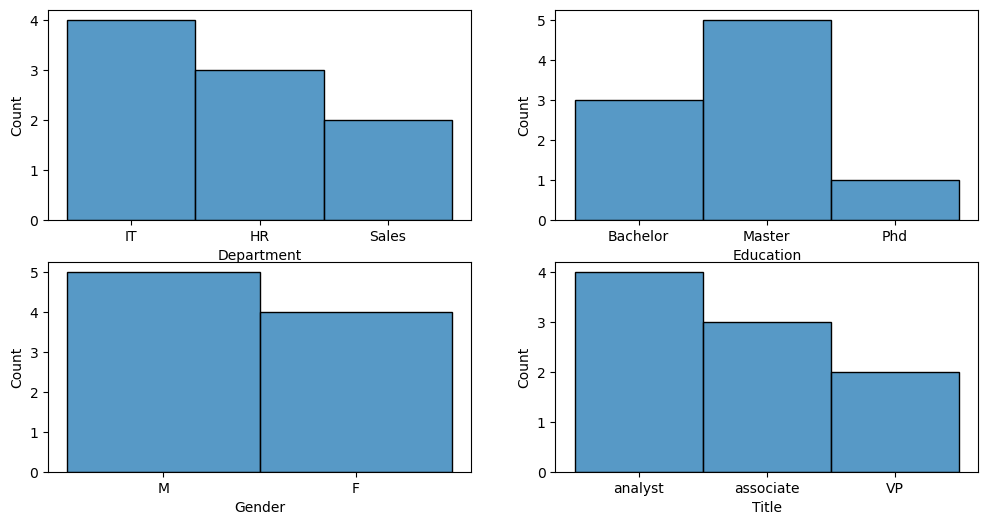

In [192]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
sns.histplot(x=df['Department'], ax=axs[0, 0]) # Plot histogram for Department
sns.histplot(x=df['Education'], ax=axs[0, 1]) # Plot histogram for Education
sns.histplot(x=df['Gender'], ax=axs[1, 0]) # Plot histogram for Gender
sns.histplot(x=df['Title'], ax=axs[1, 1]) # Plot histogram for Title
plt.show()

#### ¿Cuál es el salario medio en esta empresa?

In [170]:
mean_salary = df['Salary'].mean()
print(mean_salary)

48.888888888888886


#### ¿Cuál es el salario más alto?

In [172]:
max_salary = df['Salary'].max()
print(max_salary)

70


#### ¿Cuál es el salario más bajo?

In [174]:
min_salary = df['Salary'].min()
print(min_salary)

30


#### ¿Quiénes son los empleados con el salario más bajo?

In [182]:
poorest_emplyees = df[df['Salary'] == 30]
print(poorest_emplyees['Name'])

1    Maria
2    David
Name: Name, dtype: object


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [184]:
David = df[df['Name'] == 'David']
print(David)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [194]:
print(David['Salary'])

2    30
Name: Salary, dtype: int64


#### Printea todas las líneas en las que el cargo es asociado

In [204]:
associado = df[df['Title'] == 'associate']
print(associado)


     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [206]:
df.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [210]:
df.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [214]:
associados_ricos = associado[associado['Salary'] > 55]
print(associados_ricos['Name'])

7    Pedro
Name: Name, dtype: object


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [218]:
salary_by_year = df.groupby('Years')['Salary'].mean().reset_index()
salary_by_year

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


#### ¿Cuál es el salario medio por título?

In [222]:
salary_by_title = df.groupby('Title')['Salary'].mean().reset_index()
salary_by_title

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

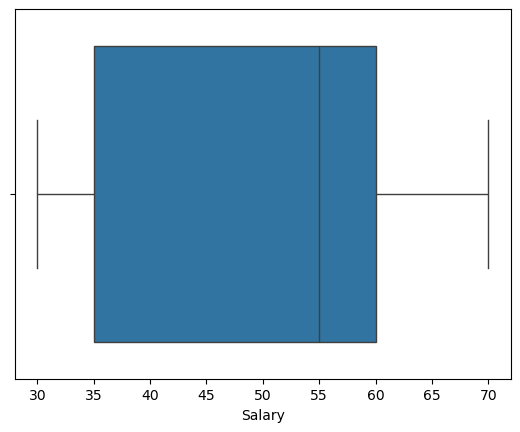

In [224]:
sns.boxplot(x="Salary", data=df) 
plt.show() # There are no outliers. The median is 55, which is greater than the mean meaning the data is positively skewed. More employees earn less than median. 


In [227]:
first_quartile = df['Salary'].quantile(0.25)  
print(f"First Quartile (Q1): {first_quartile}")

First Quartile (Q1): 35.0


In [231]:
third_quartile = df['Salary'].quantile(0.75)  
print(f"Third Quartile (Q1): {first_quartile}")

Third Quartile (Q1): 60.0


#### ¿Es diferente el salario medio por género?

In [233]:
salary_by_gender = df.groupby('Gender')['Salary'].mean().reset_index() # Males earn slightly more than females
salary_by_gender 

,Gender,Salary
0,F,47.5
1,M,50.0


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [237]:
department_min_salary = df.groupby('Department')['Salary'].min().reset_index() 
department_max_salary = df.groupby('Department')['Salary'].max().reset_index() 

department_min_years = df.groupby('Department')['Years'].min().reset_index() 
department_max_years = df.groupby('Department')['Years'].max().reset_index() 


# Printing the results
print("Minimum Salary by Department:")
print(department_min_salary)

print("\nMaximum Salary by Department:")
print(department_max_salary)

print("\nMinimum Years by Department:")
print(department_min_years)

print("\nMaximum Years by Department:")
print(department_max_years)

Minimum Salary by Department:
  Department  Salary
0         HR      30
1         IT      30
2      Sales      55

Maximum Salary by Department:
  Department  Salary
0         HR      70
1         IT      70
2      Sales      55

Minimum Years by Department:
  Department  Years
0         HR      2
1         IT      1
2      Sales      2

Maximum Years by Department:
  Department  Years
0         HR      8
1         IT      8
2      Sales      3


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [245]:
salary_difference = df.groupby('Department')['Salary'].agg(lambda x: x.max() - x.min()).reset_index()
salary_difference

# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\ironhack-lab-descriptive-stats-es\your-code\Orders.csv')
df.head(10)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [13]:
df.iloc[:10]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [16]:
# Get descriptive statistics
summary_stats = df.describe()
print(summary_stats.round(1))

print(df.dtypes) # A combimation of integers, objects, and floats

       Unnamed: 0  InvoiceNo      year     month       day      hour  \
count    397924.0   397924.0  397924.0  397924.0  397924.0  397924.0   
mean     278465.2   560617.1    2010.9       7.6       3.6      12.7   
std      152771.4    13106.2       0.2       3.4       1.9       2.3   
min           0.0   536365.0    2010.0       1.0       1.0       6.0   
25%      148333.8   549234.0    2011.0       5.0       2.0      11.0   
50%      284907.5   561893.0    2011.0       8.0       3.0      13.0   
75%      410079.2   572090.0    2011.0      11.0       5.0      14.0   
max      541908.0   581587.0    2011.0      12.0       7.0      20.0   

       Quantity  UnitPrice  CustomerID  amount_spent  
count  397924.0   397924.0    397924.0      397924.0  
mean       13.0        3.1     15294.3          22.4  
std       180.4       22.1      1713.2         309.1  
min         1.0        0.0     12346.0           0.0  
25%         2.0        1.2     13969.0           4.7  
50%         6.0      

#### ¿Cuál es el precio medio de compra?

In [19]:
mean_price = df['UnitPrice'].mean()
mean_price

3.1161744805540756

#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [22]:
min_price = df['UnitPrice'].min()
min_price

0.0

In [24]:
max_price = df['UnitPrice'].max()
max_price

8142.75

#### Seleccione todos los clientes que tenemos en España

In [27]:
spain = df[df['Country'] == 'Spain']
spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [30]:
len(spain)

2485

#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [33]:
spain_spenders = df[df['Quantity'] > 50]
spain_spenders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Selecciona pedidos de España superiores a 50 artículos

In [38]:
spain_prices_above_50 = spain_spenders[spain_spenders['amount_spent'] > 50]
spain_prices_above_50.head(100)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
175,177,536386,85099B,2010,12,3,9,jumbo bag red retrospot,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,4465,536783,71459,2010,12,4,15,hanging jam jar t-light holder,144,2010-12-02 15:19:00,0.72,15061,United Kingdom,103.68
3238,4466,536783,48194,2010,12,4,15,doormat hearts,70,2010-12-02 15:19:00,6.75,15061,United Kingdom,472.50
3241,4469,536783,22752,2010,12,4,15,set 7 babushka nesting boxes,96,2010-12-02 15:19:00,7.65,15061,United Kingdom,734.40
3242,4470,536783,22659,2010,12,4,15,lunch box i love london,64,2010-12-02 15:19:00,1.65,15061,United Kingdom,105.60


#### Seleccionar todos los pedidos gratuitos

In [42]:
free_items = df[df['UnitPrice'] == 0]
free_items.head(30)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [46]:
lunch_bag = df[df['Description'].str.contains('lunch bag')]
lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [48]:
lunch_bag_2011 = lunch_bag[lunch_bag['year'] == 2011]
lunch_bag_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Muestra la distribución de frecuencias del importe gastado en España.

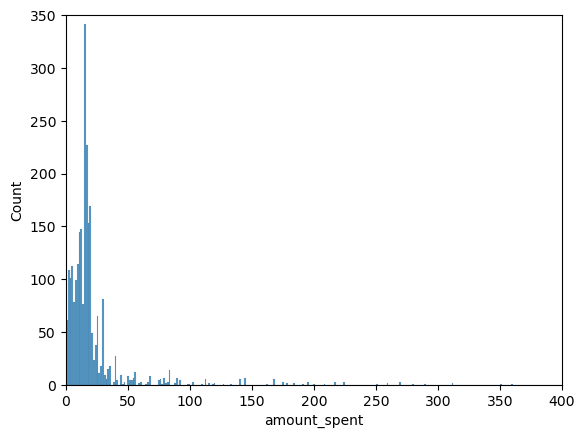

In [56]:
sns.histplot(x=spain['amount_spent'])
plt.xlim(0, 400)
plt.ylim(0, 350) 
plt.show()


#### Seleccione todos los pedidos realizados en el mes de agosto

In [58]:
august_sales = df[df['month'] == 8]
august_sales.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [68]:
by_country_in_august = august_sales['Country'].value_counts()
by_country_in_august

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### ¿Cuál es el gasto medio por país?

In [70]:
mean_amount_spent_per_countries = df.groupby('Country')['amount_spent'].mean().reset_index()
mean_amount_spent_per_countries

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### ¿Cuál es el artículo más caro?

In [72]:
most_expensive_item = df['UnitPrice'].max()
most_expensive_item

8142.75

#### ¿Cuál fue la cantidad media gastada al año?

In [76]:
average_amount_spent_per_year = df.groupby('year')['amount_spent'].mean().reset_index()
average_amount_spent_per_year

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
